<a href="https://www.kaggle.com/code/abeeradel/handwritten-recognition-naivebayes-randomforest?scriptVersionId=108749779" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries:

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings('ignore')


# Data:

In [2]:
df = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(372450, 785)

# Preprocessing:

In [4]:
df_c = df.copy()

In [5]:
df_c.rename(columns = {'0': 'label'}, inplace = True)
# check
df_c.head()

,label,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_c.label.value_counts()

14    57825
18    48419
20    29008
2     23409
19    22495
15    19341
13    19010
0     13869
12    12336
11    11586
17    11566
4     11440
24    10859
22    10784
3     10134
1      8668
9      8493
7      7218
23     6272
25     6076
16     5812
6      5762
10     5603
21     4182
5      1163
8      1120
Name: label, dtype: int64

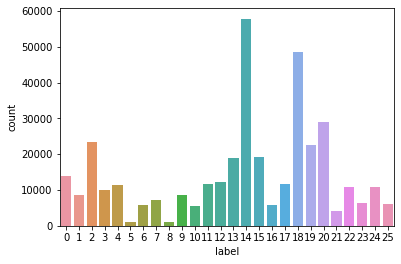

In [7]:
sns.countplot(df_c.label);

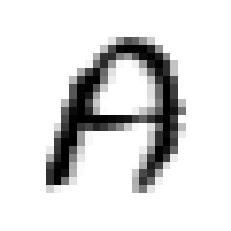

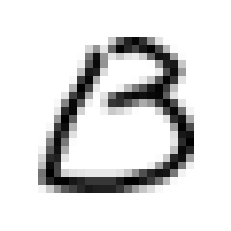

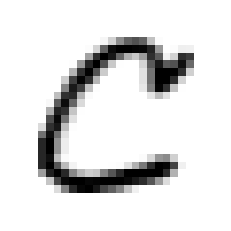

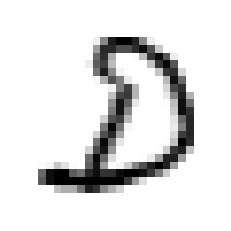

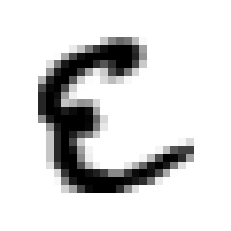

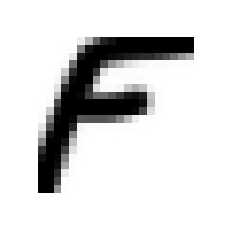

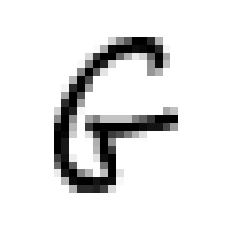

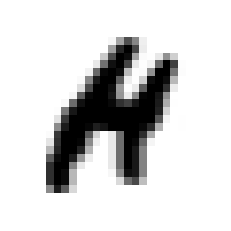

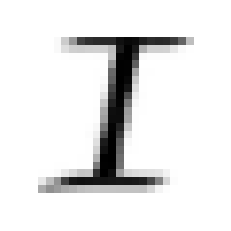

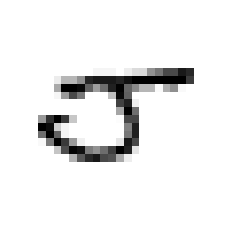

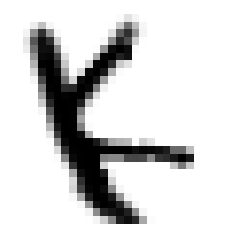

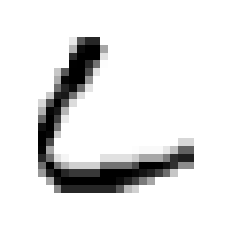

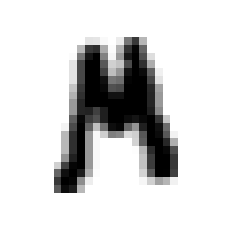

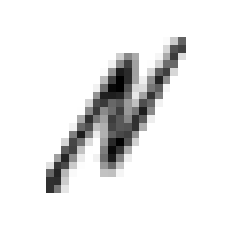

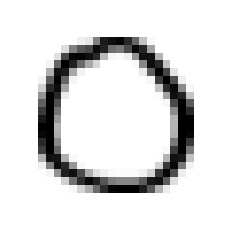

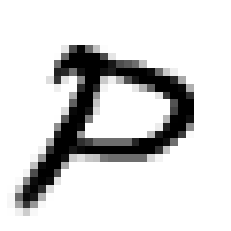

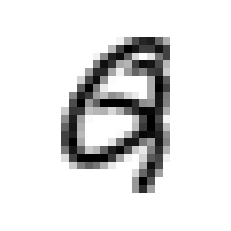

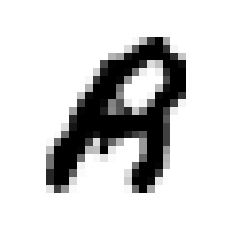

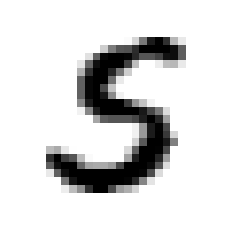

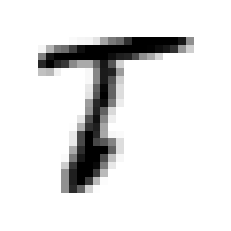

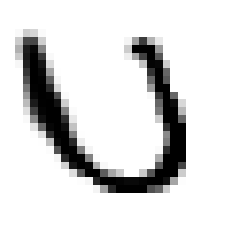

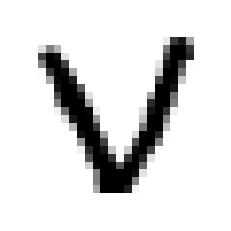

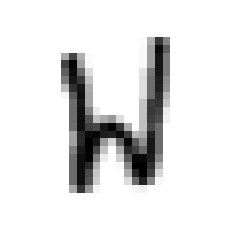

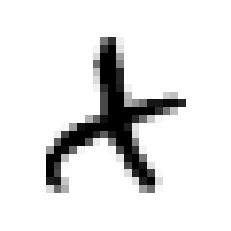

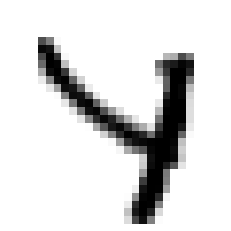

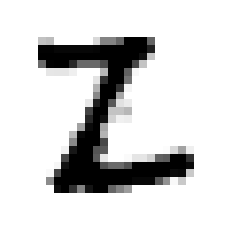

In [8]:
for i in range(26):
    dd = df_c[df_c['label']==i].iloc[1]
    x = dd[1:].values
    x = x.reshape((28, 28))
    plt.imshow(x, cmap='binary')
    plt.axis('off')
    plt.show()

# Splitting Data:

In [9]:
X = df_c.drop(columns = ['label'])
y = df_c['label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state= 42, stratify= y)

# Modeling:

## Naive Bayes:

In [11]:
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)

MultinomialNB()

In [12]:
naive_pred = naive_model.predict(X_test)
naive_pred

array([20, 20, 13, ..., 19, 23, 20])

In [13]:
print(classification_report(y_test,naive_pred))


              precision    recall  f1-score   support

           0       0.60      0.73      0.66      2774
           1       0.41      0.77      0.54      1734
           2       0.88      0.72      0.79      4682
           3       0.58      0.71      0.64      2027
           4       0.70      0.63      0.66      2288
           5       0.35      0.89      0.50       233
           6       0.57      0.74      0.64      1152
           7       0.43      0.52      0.47      1444
           8       0.14      0.89      0.24       224
           9       0.38      0.53      0.44      1699
          10       0.43      0.65      0.52      1121
          11       0.77      0.72      0.75      2317
          12       0.64      0.88      0.74      2467
          13       0.63      0.62      0.62      3802
          14       0.87      0.80      0.83     11565
          15       0.84      0.76      0.80      3868
          16       0.56      0.73      0.63      1162
          17       0.62    

# Random Forest Classifier:

In [14]:
rf_model = RandomForestClassifier(n_estimators= 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
rf_pred = rf_model.predict(X_test)

In [16]:
print(classification_report(y_test,rf_pred))


              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2774
           1       0.99      0.97      0.98      1734
           2       0.99      1.00      0.99      4682
           3       0.98      0.97      0.97      2027
           4       0.99      0.98      0.98      2288
           5       0.99      0.94      0.96       233
           6       0.99      0.97      0.98      1152
           7       0.98      0.97      0.98      1444
           8       1.00      0.96      0.98       224
           9       0.99      0.97      0.98      1699
          10       0.97      0.97      0.97      1121
          11       0.99      1.00      1.00      2317
          12       0.99      0.97      0.98      2467
          13       0.98      0.99      0.99      3802
          14       0.99      1.00      0.99     11565
          15       0.99      0.99      0.99      3868
          16       0.99      0.94      0.96      1162
          17       0.99    